<a href="https://colab.research.google.com/github/correctchemist/code/blob/main/bb1_dihydroorotate_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Dihydroorotate dehydrogenase [Part 2] Exploratory Data Analysis**

Beatrice Iwuala


## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-11-13 13:59:37--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   110MB/s    in 0.7s    

2022-11-13 13:59:38 (110 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::six==1.14.0=py37_0
  - defaults/linux-64::python==3.7.6=h0371630_2
  - defaults/linux-64::libwebp-base==1.2.4=h5eee18b_0
  - defaults/linux-64::ruamel_

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL199572,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O,inactive,42600.0
1,CHEMBL199574,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1,inactive,142600.0
2,CHEMBL372561,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O,inactive,93400.0
3,CHEMBL370865,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1,inactive,153500.0
4,CHEMBL199575,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O,inactive,200000.0
...,...,...,...,...
597,CHEMBL4569109,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1,inactive,250000.0
598,CHEMBL4568957,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1,inactive,250000.0
599,CHEMBL4449622,Cn1nc(O)c(C(N)=O)c1COc1ccccc1,inactive,250000.0
600,CHEMBL1956285,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,active,10.0


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,bioactivity_class,standard_value,canonical_smiles
0,CHEMBL199572,inactive,42600.0,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O
1,CHEMBL199574,inactive,142600.0,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1
2,CHEMBL372561,inactive,93400.0,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O
3,CHEMBL370865,inactive,153500.0,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1
4,CHEMBL199575,inactive,200000.0,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O
...,...,...,...,...
597,CHEMBL4569109,inactive,250000.0,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1
598,CHEMBL4568957,inactive,250000.0,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1
599,CHEMBL4449622,inactive,250000.0,Cn1nc(O)c(C(N)=O)c1COc1ccccc1
600,CHEMBL1956285,active,10.0,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,331.371,4.32840,1.0,2.0
1,370.202,4.55280,2.0,2.0
2,384.229,4.57710,1.0,2.0
3,317.344,4.30410,2.0,2.0
4,305.333,3.81460,1.0,2.0
...,...,...,...,...
597,302.330,2.48610,1.0,5.0
598,338.363,3.27630,1.0,5.0
599,247.254,0.80360,2.0,5.0
600,415.338,5.94542,1.0,5.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,331.371,4.32840,1.0,2.0
1,370.202,4.55280,2.0,2.0
2,384.229,4.57710,1.0,2.0
3,317.344,4.30410,2.0,2.0
4,305.333,3.81460,1.0,2.0
...,...,...,...,...
597,302.330,2.48610,1.0,5.0
598,338.363,3.27630,1.0,5.0
599,247.254,0.80360,2.0,5.0
600,415.338,5.94542,1.0,5.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL199572,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O,inactive,42600.0
1,CHEMBL199574,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1,inactive,142600.0
2,CHEMBL372561,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O,inactive,93400.0
3,CHEMBL370865,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1,inactive,153500.0
4,CHEMBL199575,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O,inactive,200000.0
...,...,...,...,...
597,CHEMBL4569109,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1,inactive,250000.0
598,CHEMBL4568957,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1,inactive,250000.0
599,CHEMBL4449622,Cn1nc(O)c(C(N)=O)c1COc1ccccc1,inactive,250000.0
600,CHEMBL1956285,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,active,10.0


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL199572,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O,inactive,42600.0,331.371,4.32840,1.0,2.0
1,CHEMBL199574,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1,inactive,142600.0,370.202,4.55280,2.0,2.0
2,CHEMBL372561,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O,inactive,93400.0,384.229,4.57710,1.0,2.0
3,CHEMBL370865,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1,inactive,153500.0,317.344,4.30410,2.0,2.0
4,CHEMBL199575,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O,inactive,200000.0,305.333,3.81460,1.0,2.0
...,...,...,...,...,...,...,...,...
597,CHEMBL4569109,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1,inactive,250000.0,302.330,2.48610,1.0,5.0
598,CHEMBL4568957,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1,inactive,250000.0,338.363,3.27630,1.0,5.0
599,CHEMBL4449622,Cn1nc(O)c(C(N)=O)c1COc1ccccc1,inactive,250000.0,247.254,0.80360,2.0,5.0
600,CHEMBL1956285,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,active,10.0,415.338,5.94542,1.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count    6.020000e+02
mean     3.499551e+04
std      9.109785e+04
min      6.000000e+00
25%      2.425000e+02
50%      5.300000e+03
75%      2.800000e+04
max      1.071519e+06
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL199572,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O,inactive,331.371,4.32840,1.0,2.0,42600.0
1,CHEMBL199574,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1,inactive,370.202,4.55280,2.0,2.0,142600.0
2,CHEMBL372561,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O,inactive,384.229,4.57710,1.0,2.0,93400.0
3,CHEMBL370865,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1,inactive,317.344,4.30410,2.0,2.0,153500.0
4,CHEMBL199575,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O,inactive,305.333,3.81460,1.0,2.0,200000.0
...,...,...,...,...,...,...,...,...
597,CHEMBL4569109,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1,inactive,302.330,2.48610,1.0,5.0,250000.0
598,CHEMBL4568957,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1,inactive,338.363,3.27630,1.0,5.0,250000.0
599,CHEMBL4449622,Cn1nc(O)c(C(N)=O)c1COc1ccccc1,inactive,247.254,0.80360,2.0,5.0,250000.0
600,CHEMBL1956285,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,active,415.338,5.94542,1.0,5.0,10.0


In [ ]:
df_norm.standard_value_norm.describe()

count    6.020000e+02
mean     3.499551e+04
std      9.109785e+04
min      6.000000e+00
25%      2.425000e+02
50%      5.300000e+03
75%      2.800000e+04
max      1.071519e+06
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL199572,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O,inactive,331.371,4.32840,1.0,2.0,4.370590
1,CHEMBL199574,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1,inactive,370.202,4.55280,2.0,2.0,3.845880
2,CHEMBL372561,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O,inactive,384.229,4.57710,1.0,2.0,4.029653
3,CHEMBL370865,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1,inactive,317.344,4.30410,2.0,2.0,3.813892
4,CHEMBL199575,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O,inactive,305.333,3.81460,1.0,2.0,3.698970
...,...,...,...,...,...,...,...,...
597,CHEMBL4569109,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1,inactive,302.330,2.48610,1.0,5.0,3.602060
598,CHEMBL4568957,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1,inactive,338.363,3.27630,1.0,5.0,3.602060
599,CHEMBL4449622,Cn1nc(O)c(C(N)=O)c1COc1ccccc1,inactive,247.254,0.80360,2.0,5.0,3.602060
600,CHEMBL1956285,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,active,415.338,5.94542,1.0,5.0,8.000000


In [ ]:
df_final.pIC50.describe()

count    602.000000
mean       5.541766
std        1.196415
min        2.970000
25%        4.552842
50%        5.275724
75%        6.615357
max        8.221849
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [ ]:
df_final.to_csv('dihydoorotate_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL199572,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O,inactive,331.371,4.32840,1.0,2.0,4.370590
1,CHEMBL199574,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1,inactive,370.202,4.55280,2.0,2.0,3.845880
2,CHEMBL372561,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O,inactive,384.229,4.57710,1.0,2.0,4.029653
3,CHEMBL370865,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1,inactive,317.344,4.30410,2.0,2.0,3.813892
4,CHEMBL199575,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O,inactive,305.333,3.81460,1.0,2.0,3.698970
...,...,...,...,...,...,...,...,...
597,CHEMBL4569109,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1,inactive,302.330,2.48610,1.0,5.0,3.602060
598,CHEMBL4568957,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1,inactive,338.363,3.27630,1.0,5.0,3.602060
599,CHEMBL4449622,Cn1nc(O)c(C(N)=O)c1COc1ccccc1,inactive,247.254,0.80360,2.0,5.0,3.602060
600,CHEMBL1956285,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,active,415.338,5.94542,1.0,5.0,8.000000


Let's write this to CSV file.

In [ ]:
df_2class.to_csv('dhydroorate_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

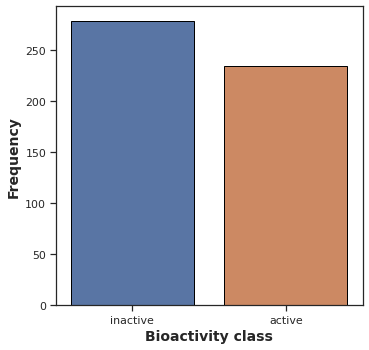

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

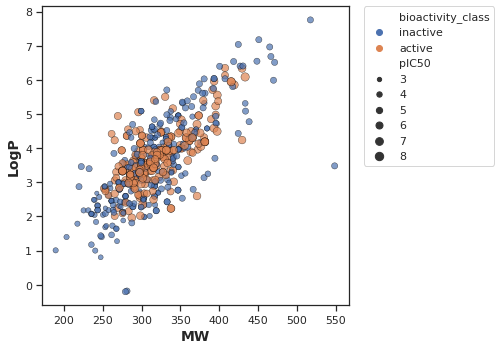

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

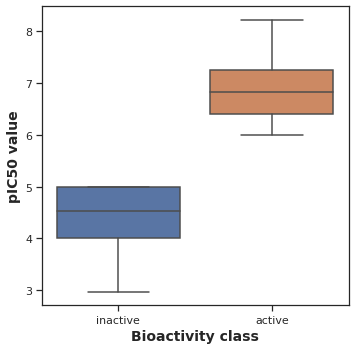

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,65286.0,2.844643e-85,0.05,Different distribution (reject H0)


#### **MW**

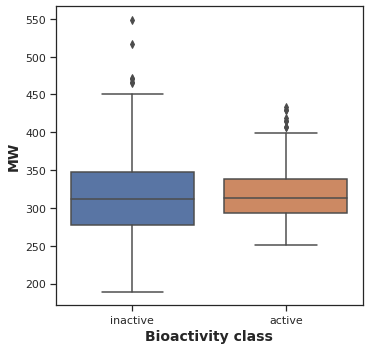

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,35260.5,0.117589,0.05,Same distribution (fail to reject H0)


#### **LogP**

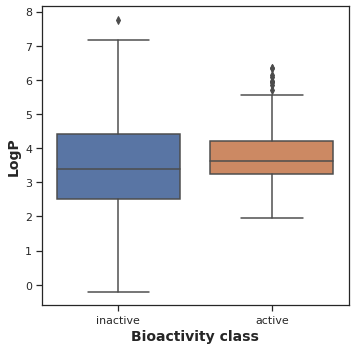

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,37460.0,0.003973,0.05,Different distribution (reject H0)


#### **NumHDonors**

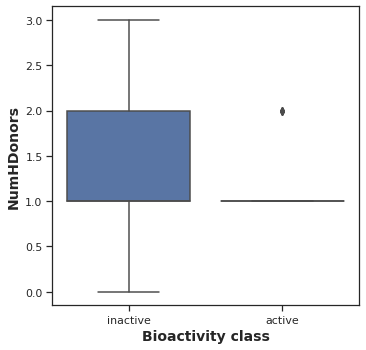

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,23931.0,3.318725e-12,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

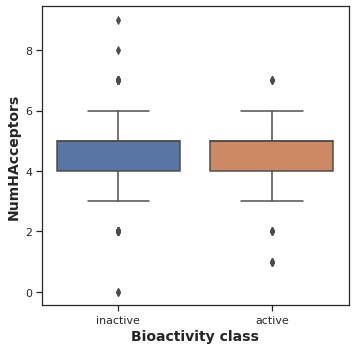

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,30262.0,0.135743,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors (MW, LogP, NumHDonors, NunHAcceptors), MW and NumHAcceptors exhibited ***no difference*** between the **actives** and **inactives** While the other  two discriptors (LopP and NumHDonors) shows ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

Scanning files 
updating: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
updating: plot_MW.pdf (deflated 39%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: dihydoorotate_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: plot_bioactivity_class.pdf (deflated 39%)
updating: dhydroorate_05_bioactivity_data_2class_pIC50.csv (deflated 78%)
updating: bioactivity_preprocessed_data.csv (deflated 84%)
updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: plot_MW_vs_LogP.pdf (deflated 6%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: plot_ic50.pdf (deflated 37%)
updating: plot_LogP.pdf (deflated 36%)
